In [173]:
import sklearn 
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from iaml01cw2_helpers import *
# from iaml01cw2_my_helpers import *

In [174]:
print(sklearn.__version__)

0.19.1


## Question 1

In [175]:
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST("../data")
Xtrn_orig = np.copy(Xtrn)
Xtst_orig = np.copy(Xtst)

Xtrn = Xtrn / 255.0
Xtst = Xtst / 255.0

Xmean = np.mean(Xtrn, axis=0)
Xmean.shape

Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean

##### Question 1.1

In [176]:
for i in [0,-1]:
    print(i, "\t", Xtrn_nm[i,0:4])

0 	 [-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]
-1 	 [-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]


##### Question 1.2

In [177]:
grid = np.zeros((10, 5, 784))
sample_nums = np.zeros((10, 5), "uint32")

for label in range(10):
    samples_of_class = np.array([Xtrn[i,:] for i in range(len(Xtrn_nm)) if Ytrn[i] == label])
    indices_of_class = np.array([i for i in range(len(Xtrn_nm)) if Ytrn[i] == label])

    class_mean = np.mean(samples_of_class, axis=0)
    
    distances_to_mean = np.array([np.linalg.norm(x - class_mean) for x in samples_of_class])

    ab_unsorted = np.argpartition(distances_to_mean, 2)[:2]
    ab = ab_unsorted[np.argsort(distances_to_mean[ab_unsorted])]

    yz_unsorted = np.argpartition(-distances_to_mean, 2)[:2]
    yz = yz_unsorted[np.argsort(distances_to_mean[yz_unsorted])]

    a = samples_of_class[ab[0]]
    b = samples_of_class[ab[1]]
    y = samples_of_class[yz[0]]
    z = samples_of_class[yz[1]]
    a_num = indices_of_class[ab[0]]
    b_num = indices_of_class[ab[1]]
    y_num = indices_of_class[yz[0]]
    z_num = indices_of_class[yz[1]]
    
    grid[label, 0] = class_mean
    grid[label, 1] = a
    grid[label, 2] = b
    grid[label, 3] = y
    grid[label, 4] = z
    
    sample_nums[label, 1] = a_num
    sample_nums[label, 2] = b_num
    sample_nums[label, 3] = y_num
    sample_nums[label, 4] = z_num

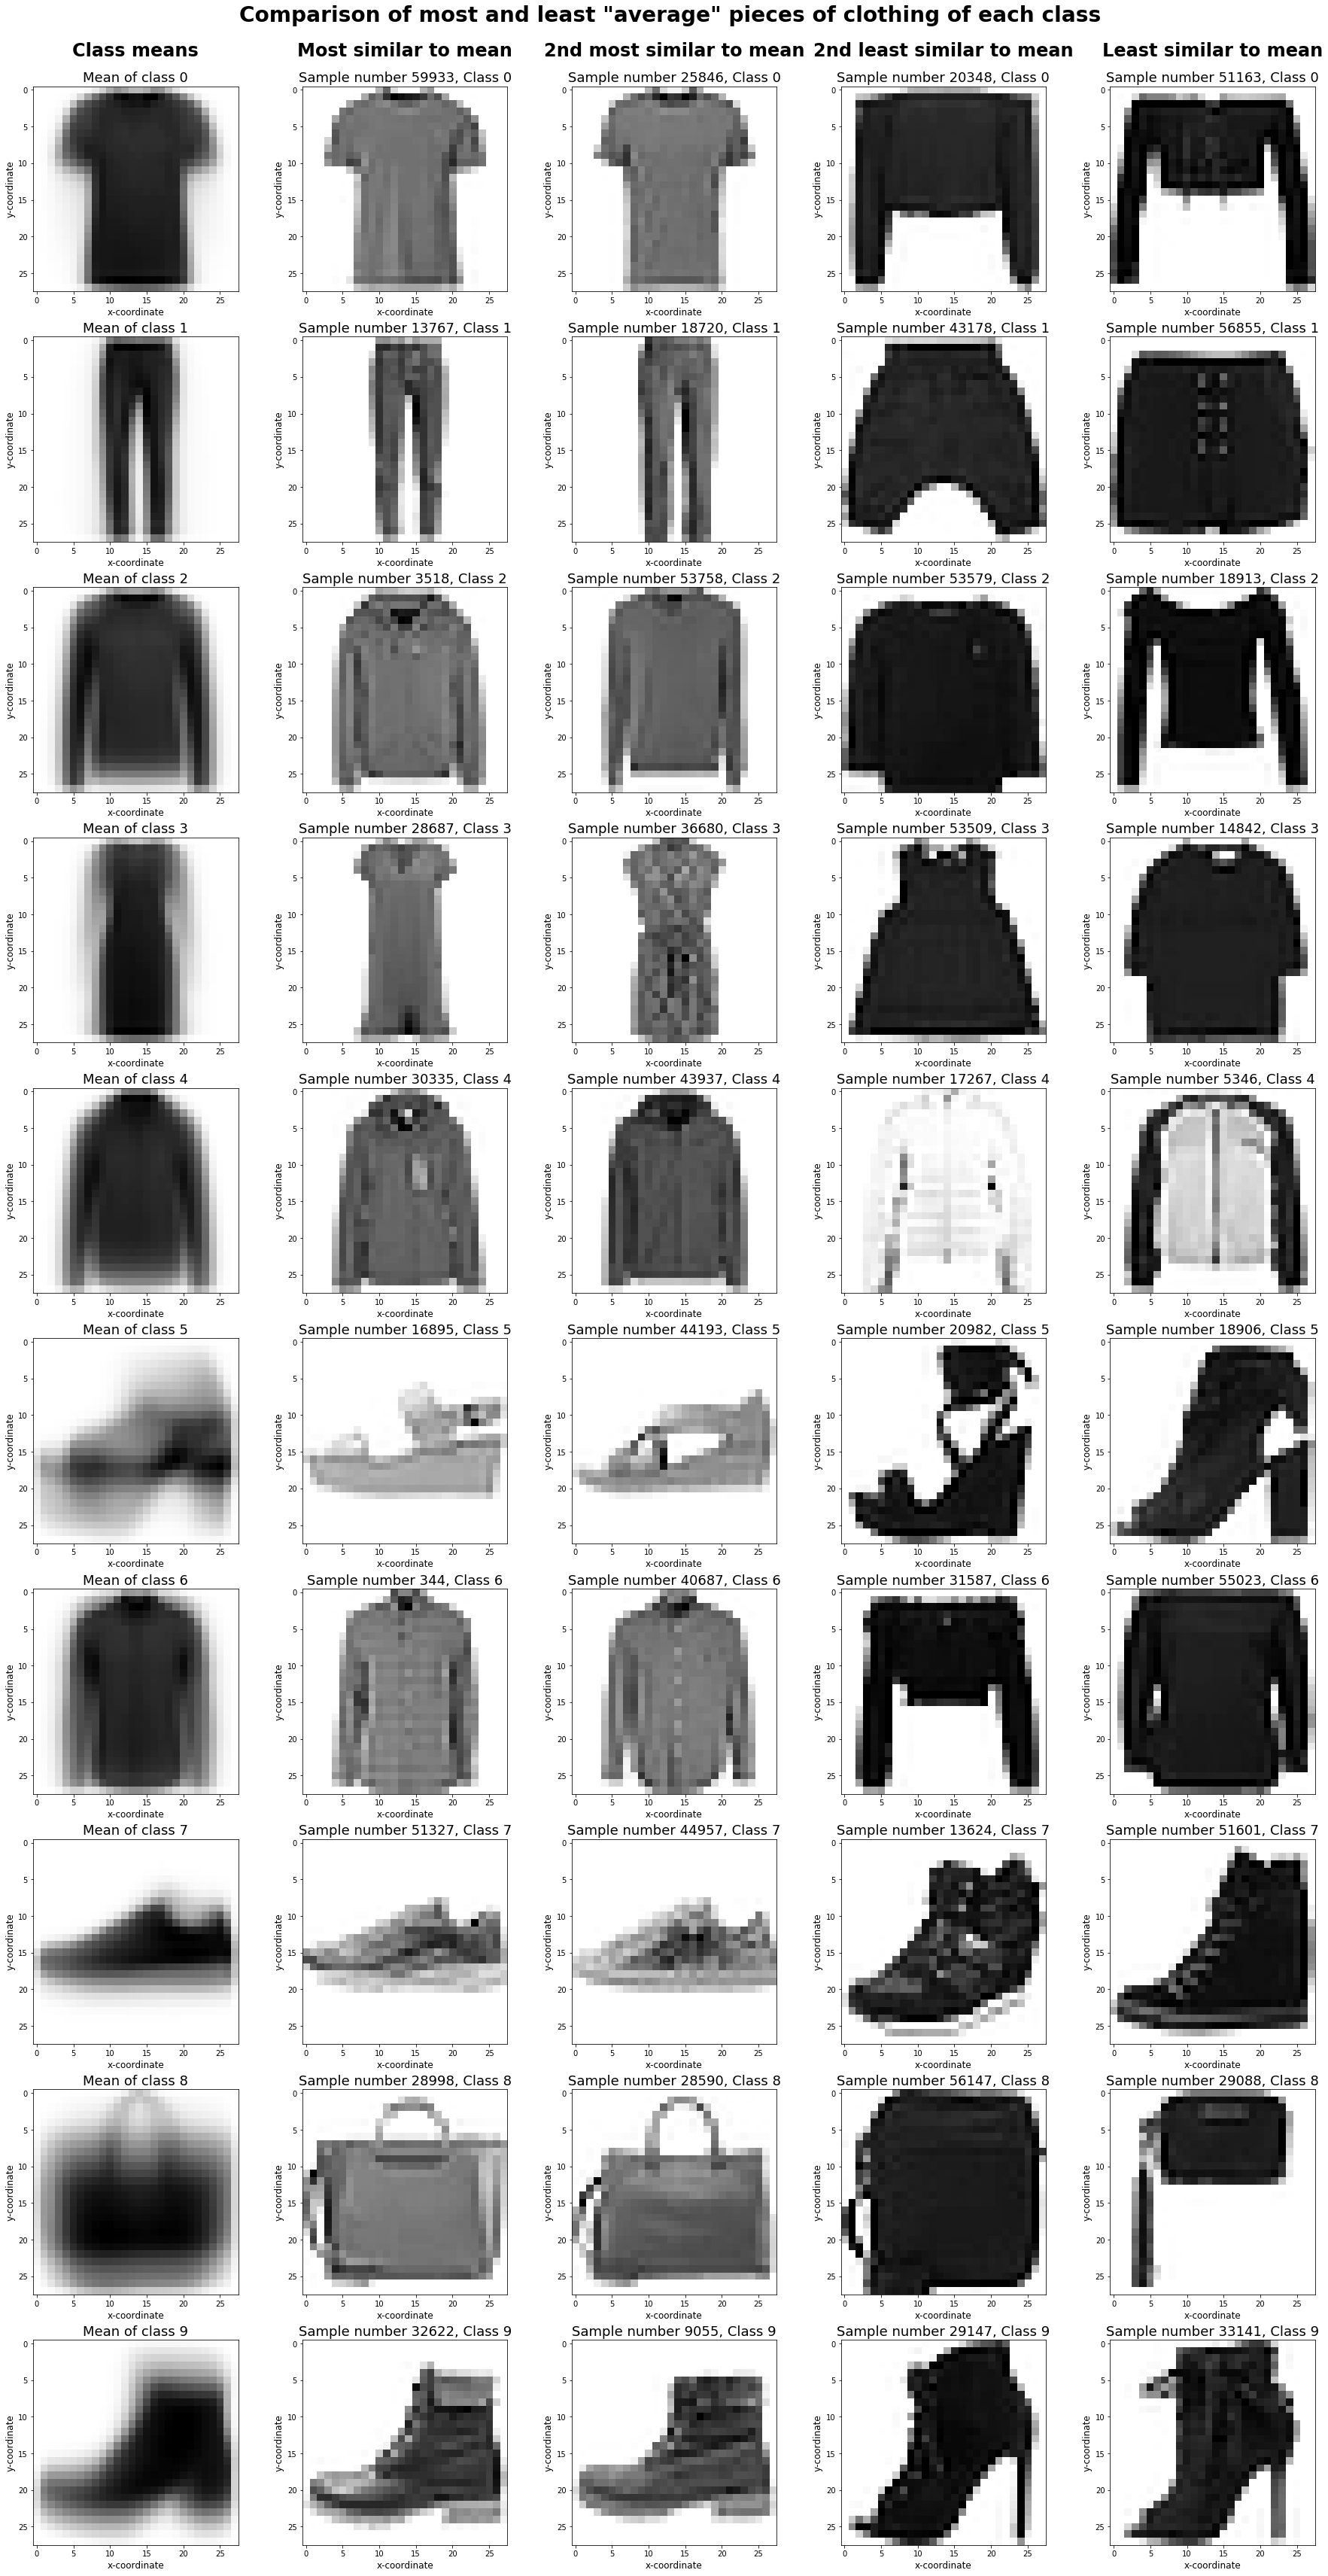

In [178]:
fig, ax = plt.subplots(nrows=10, ncols=5, figsize=(25,50))

st = fig.suptitle("Comparison of most and least \"average\" " 
                  "pieces of clothing of each class", fontsize=28, weight="bold")

cols = ["Class means", "Most similar to mean", "2nd most similar to mean", 
        "2nd least similar to mean", "Least similar to mean"]
pad = 40
for a, col in zip(ax[0], cols):
    a.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline', fontsize=24, weight="bold")

for label in range(10):
    for j in range(5):
        vis = grid[label][j].reshape(28, 28)
        ax[label][j].imshow(vis, cmap="gray_r")
        ax[label][j].set_xlabel("x-coordinate", fontsize=12)
        ax[label][j].set_ylabel("y-coordinate", fontsize=12)
        if j == 0:
            ax[label][j].set_title("Mean of class " + str(label), fontsize=18)
        else:
            ax[label][j].set_title("Sample number " + str(sample_nums[label, j]) + ", Class " + str(label), fontsize=18)
    
        
fig.tight_layout()

st.set_y(0.95)
fig.subplots_adjust(top=0.92)

plt.show()

##### Question 1.3

In [179]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(Xtrn_nm)
ex_var = pca.explained_variance_

In [180]:
print(ex_var[0:5])
sum(ex_var)

[19.80980567 12.11221047  4.10615661  3.38182839  2.62477022]


68.21739795109501

##### Question 1.4

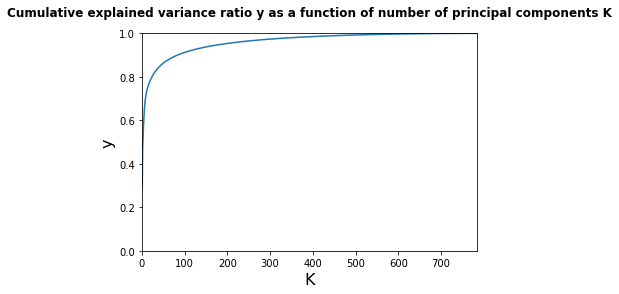

In [181]:
cum_ex_var = np.cumsum(pca.explained_variance_ratio_)
xs = [i for i in range(1, 785)]
plt.plot(xs, cum_ex_var)
plt.axis([1, 784, 0, 1])
t = plt.title("Cumulative explained variance ratio y as a function of number of principal components K", 
              weight="bold")
t.set_y(1.05)
plt.xlabel("K", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.show()

In [182]:
print(cum_ex_var[4])
print(cum_ex_var[49])
print(cum_ex_var[83])
print(cum_ex_var[186])
print(cum_ex_var[783])

0.6161884303430368
0.8626917002845211
0.9006231349614562
0.9500039103537347
1.0000000000000007


##### Question 1.5

In [183]:
top_ten_components = pca.components_[:10]
ex_var = pca.explained_variance_

D:\Programme_D\Anaconda3\envs\py3iaml\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


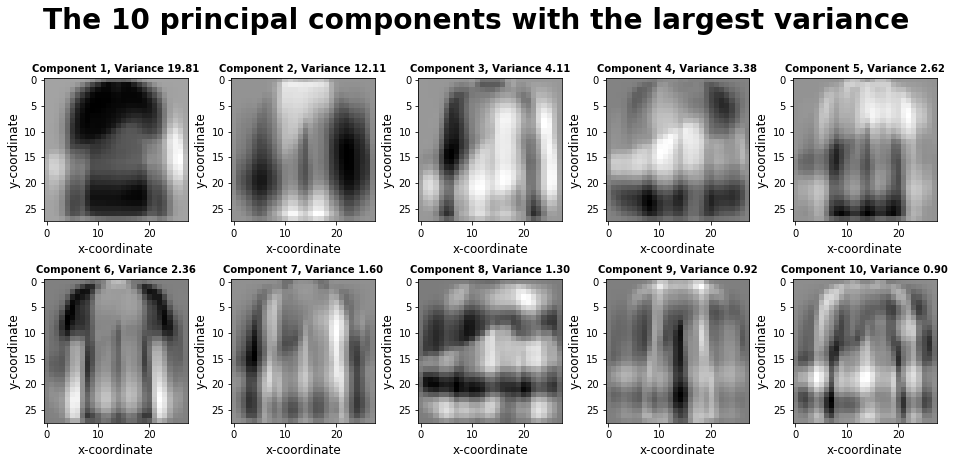

In [184]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(16,7), gridspec_kw = {'wspace':0.3, 'hspace':0.4})

st = fig.suptitle("The 10 principal components with the largest variance", fontsize=28, weight="bold")

cols = ["Class means", "Most similar to mean", "2nd most similar to mean", 
        "2nd least similar to mean", "Least similar to mean"]

for i in range(10):
    vis = top_ten_components[i].reshape(28, 28)
    ax[i//5][i%5].imshow(vis, cmap="gray_r")
    ax[i//5][i%5].set_xlabel("x-coordinate", fontsize=12)
    ax[i//5][i%5].set_ylabel("y-coordinate", fontsize=12)
    ax[i//5][i%5].set_title("Component " + str(i + 1) + ", Variance " + "{:.2f}".format(ex_var[i]), fontsize=10, weight="bold")

st.set_y(0.95)
fig.subplots_adjust(top=0.81)

fig.tight_layout()

plt.show()

##### Question 1.6

In [193]:
pivots = np.zeros((10,784))
reconstructed_pivots = np.zeros((10,4,784))
Ks = [5, 20, 50, 200]
for j in range(4):
    K = Ks[j]
    pca = PCA(n_components=K, random_state=1)
    pca.fit(Xtrn_nm)
    for label in range(10):
        samples_of_class = np.array([Xtrn_nm[i,:] for i in range(len(Xtrn_nm)) if Ytrn[i] == label])
        pivot = samples_of_class[0]
        pivots[label] = pivot
        pivot_trans = pca.transform([pivot])[0]
        reconstructed_pivot = pca.inverse_transform([pivot_trans])[0]
        #reconstructed_pivot = sum([pivot_trans[i] * pca.components_[i] for i in range(K)])
        reconstructed_pivots[label, j] = reconstructed_pivot

In [194]:
from sklearn.metrics import mean_squared_error

rmses = np.zeros((10,4))
for i in range(10):
    pivot = pivots[i]
    for j in range(4):
        reconstructed_pivot = reconstructed_pivots[i][j]
        t = 0
        for k in range(784):
            t += (reconstructed_pivot[k] - pivot[k])**2
        t = t/784
        t = np.sqrt(t)
        #t = np.sqrt(mean_squared_error(reconstructed_pivot, pivot))
        rmses[i,j] = t

In [195]:
for i in range(10):
    print("Class", i, ":")
    print(rmses[i])

Class 0 :
[0.25614866 0.14994362 0.12716915 0.06094674]
Class 1 :
[0.1980244  0.14049831 0.09491171 0.03784244]
Class 2 :
[0.19870016 0.14560485 0.12433247 0.08020504]
Class 3 :
[0.14565798 0.10727048 0.08325879 0.05640047]
Class 4 :
[0.1182087  0.10267068 0.08808121 0.04702271]
Class 5 :
[0.18112976 0.15859408 0.14266361 0.08935704]
Class 6 :
[0.12947928 0.09590067 0.07197294 0.04626613]
Class 7 :
[0.16562538 0.12783358 0.1065941  0.06407042]
Class 8 :
[0.22339659 0.14493296 0.12373874 0.09136479]
Class 9 :
[0.18351042 0.15105776 0.12156476 0.07222478]


##### Question 1.7

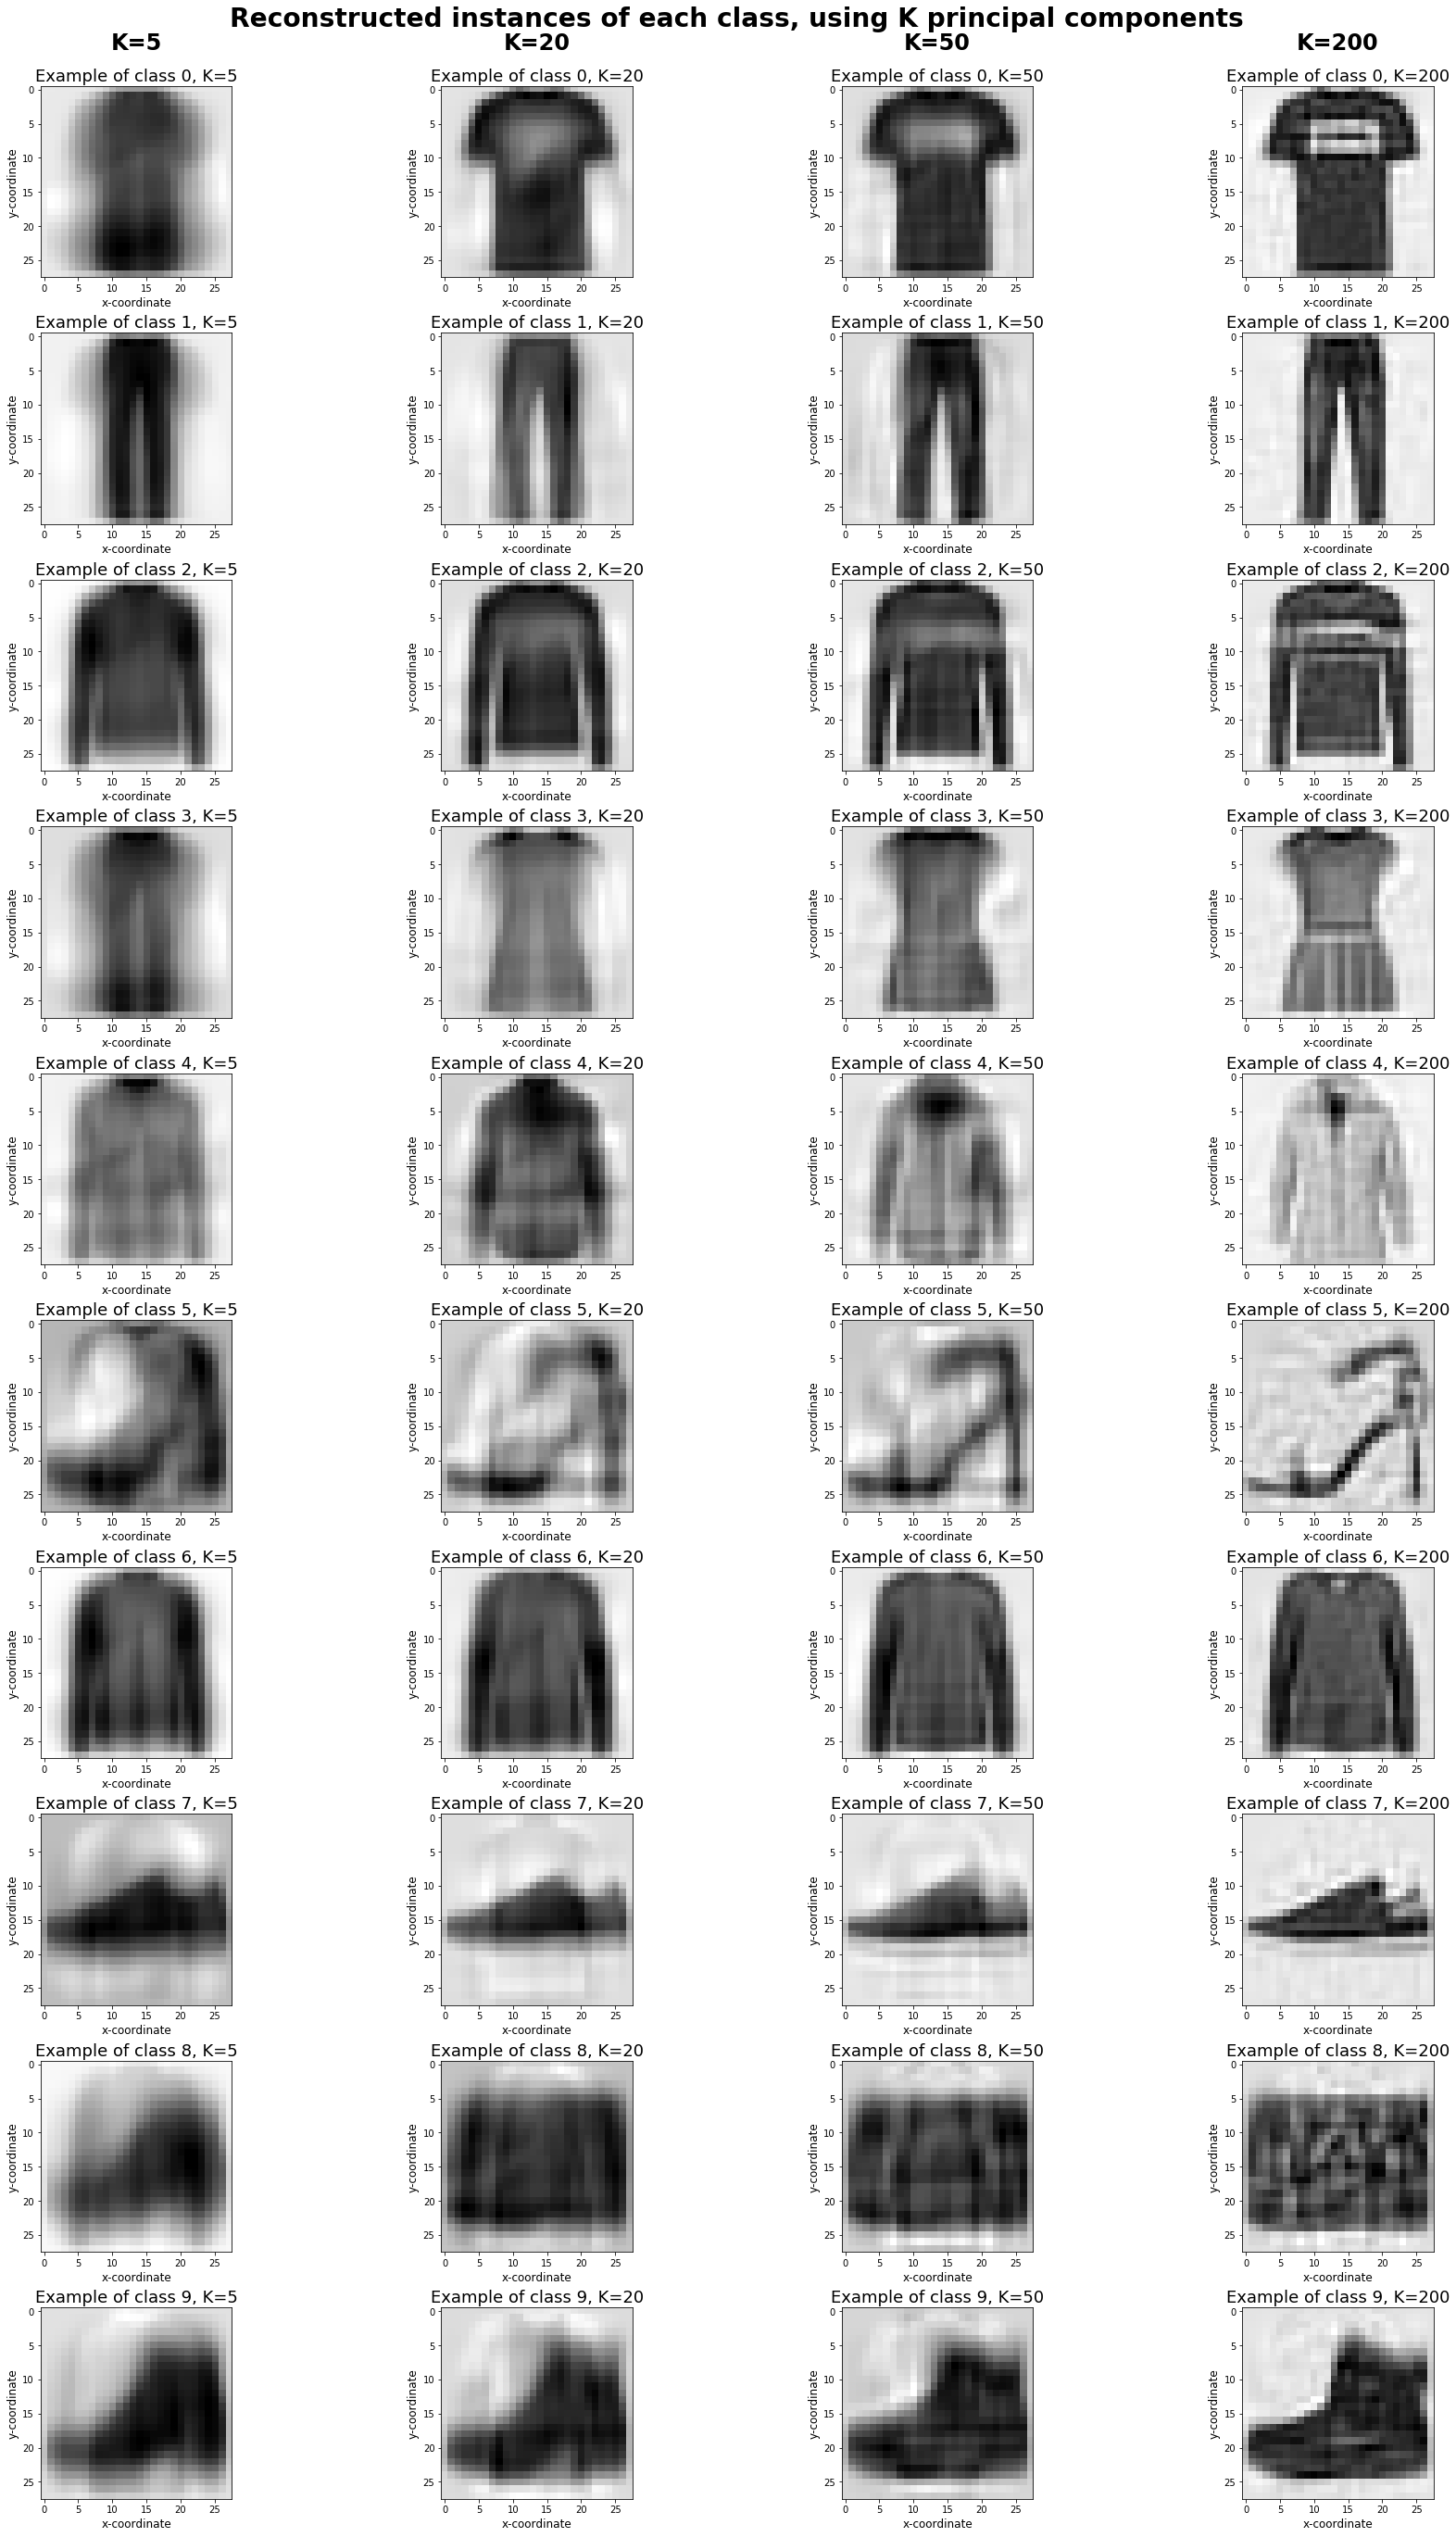

In [188]:
fig, ax = plt.subplots(nrows=10, ncols=4, figsize=(25,40))

st = fig.suptitle("Reconstructed instances of each class, using K principal components", fontsize=28, weight="bold")

cols = ["K=5", "K=20", "K=50", "K=200"]
pad = 40
for a, col in zip(ax[0], cols):
    a.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline', fontsize=24, weight="bold")

for label in range(10):
    for j in range(4):
        vis = (reconstructed_pivots[label][j] + Xmean).reshape(28, 28)
        ax[label][j].imshow(vis, cmap="gray_r")
        ax[label][j].set_xlabel("x-coordinate", fontsize=12)
        ax[label][j].set_ylabel("y-coordinate", fontsize=12)
        ax[label][j].set_title("Example of class " + str(label) + ", K=" + str(Ks[j]), fontsize=18)
        
fig.tight_layout()

st.set_y(0.95)
fig.subplots_adjust(top=0.92)

plt.show()

##### Question 1.8

In [189]:
pca = PCA(n_components=2)
pca.fit(Xtrn_nm)
two_d_rep = pca.transform(Xtrn_nm)

In [190]:
two_d_rep.shape

(60000, 2)

In [191]:
#tem = np.array([two_d_rep[i] for i in range(60000) if Ytrn[i]==0])

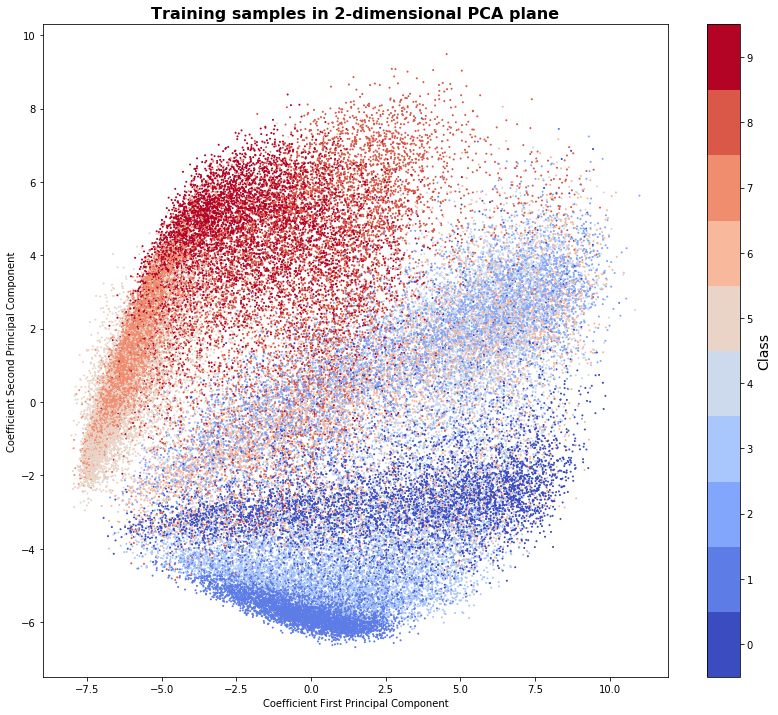

In [192]:
fig, ax = plt.subplots(figsize=(14, 12))
sc = plt.scatter(two_d_rep[:,0], two_d_rep[:, 1], c=Ytrn, cmap=plt.get_cmap('coolwarm'), s=1)
plt.title("Training samples in 2-dimensional PCA plane", weight="bold", fontsize=16)
plt.xlabel("Coefficient First Principal Component")
plt.ylabel("Coefficient Second Principal Component")
#bar = plt.colorbar()
cbar = plt.colorbar(sc, ticks=np.arange(0,10), boundaries=np.arange(0,11)-0.5)
cbar.ax.set_ylabel("Class", fontsize=14)
plt.show()

## Question 2

##### Question 2.1

In [170]:
from sklearn.linear_model import LogisticRegression

In [171]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(Xtrn_nm, Ytrn)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [172]:
from sklearn.metrics import confusion_matrix

classes = range(10)

cm = confusion_matrix(Ytst, log_reg.predict(Xtst_nm), labels=classes)
cm

array([[819,   3,  15,  50,   7,   4,  90,   1,  11,   0],
       [  5, 953,   4,  27,   5,   0,   3,   1,   2,   0],
       [ 27,   4, 731,  11, 133,   0,  82,   2,   9,   1],
       [ 31,  15,  14, 866,  33,   0,  37,   0,   4,   0],
       [  0,   3, 115,  38, 760,   2,  72,   0,  10,   0],
       [  2,   0,   0,   1,   0, 911,   0,  56,  10,  20],
       [147,   3, 128,  46, 108,   0, 539,   0,  28,   1],
       [  0,   0,   0,   0,   0,  32,   0, 936,   1,  31],
       [  7,   1,   6,  11,   3,   7,  15,   5, 945,   0],
       [  0,   0,   0,   1,   0,  15,   1,  42,   0, 941]], dtype=int64)

In [145]:
sum(cm)

array([1038,  982, 1013, 1051, 1049,  971,  839, 1043, 1020,  994],
      dtype=int64)

In [146]:
for i in range(10):
    print(sum(cm[i]))

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [147]:
from sklearn.metrics import accuracy_score

accuracy_score(Ytst, log_reg.predict(Xtst_nm))

0.8401

In [148]:
from sklearn.svm import SVC

##### Question 2.2

In [28]:
svm = SVC(kernel="rbf", C=1.0, gamma="auto", random_state=42)
svm.fit(Xtrn_nm, Ytrn)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
predictions = svm.predict(Xtst_nm)
cm = confusion_matrix(Ytst, predictions, labels=classes)
cm

array([[845,   2,   8,  51,   4,   4,  72,   0,  14,   0],
       [  4, 951,   7,  31,   5,   0,   1,   0,   1,   0],
       [ 15,   2, 748,  11, 137,   0,  79,   0,   8,   0],
       [ 32,   6,  12, 881,  26,   0,  40,   0,   3,   0],
       [  1,   0,  98,  36, 775,   0,  86,   0,   4,   0],
       [  0,   0,   0,   1,   0, 914,   0,  57,   2,  26],
       [185,   1, 122,  39,  95,   0, 533,   0,  25,   0],
       [  0,   0,   0,   0,   0,  34,   0, 925,   0,  41],
       [  3,   1,   8,   5,   2,   4,  13,   4, 959,   1],
       [  0,   0,   0,   0,   0,  22,   0,  47,   1, 930]], dtype=int64)

In [30]:
sum(cm)

array([1085,  963, 1003, 1055, 1044,  978,  824, 1033, 1017,  998],
      dtype=int64)

In [31]:
for i in range(10):
    print(sum(cm[i]))

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [32]:
accuracy_score(Ytst, predictions)

0.8461

##### Question 2.3

In [33]:
top_two_components = pca.components_
top_two_variances = pca.explained_variance_
top_two_deviations = [np.sqrt(top_two_variances[0]), np.sqrt(top_two_variances[1])]
log_reg_predictions = np.zeros((100, 100), "uint8")
coeffs = np.zeros((100, 100, 2))
components = np.zeros((100, 100, 784))
for i in range(0, 100):
    for j in range(0, 100):
        coeffs[i,j,0] = top_two_deviations[0] * (-5 + i*1.01010101/10)
        coeffs[i,j,1] = top_two_deviations[1] * (-5 + j*1.01010101/10)
        frst_comp = top_two_deviations[0] * (-5 + i*1.01010101/10) * top_two_components[0]
        scnd_comp = top_two_deviations[1] * (-5 + j*1.01010101/10) * top_two_components[1]
        components[i,j] = frst_comp + scnd_comp
        log_reg_predictions[i, j] = log_reg.predict([frst_comp + scnd_comp])

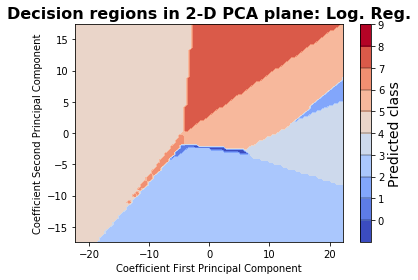

In [34]:
import matplotlib.colors as mc

levels = np.arange(-1,10,1)
norm = mc.BoundaryNorm(levels, 256)
ticks = [0,1,2,3,4,5,6,7,8,9]
cf = plt.contourf(coeffs[:,:,0], coeffs[:,:,1], log_reg_predictions, levels=levels, cmap = "coolwarm", norm=norm)
plt.title("Decision regions in 2-D PCA plane: Log. Reg.", weight="bold", fontsize=16)
plt.xlabel("Coefficient First Principal Component")
plt.ylabel("Coefficient Second Principal Component")
cbar = plt.colorbar(ticks=ticks, drawedges=True)
cbar.ax.set_ylabel("Predicted class", fontsize=14)
plt.show()

In [35]:
np.array(np.unique(log_reg_predictions, return_counts=True)).T

array([[   0,   43],
       [   1,   25],
       [   2,  118],
       [   3, 2925],
       [   4,  764],
       [   5, 3343],
       [   6, 1398],
       [   7,   47],
       [   8, 1337]], dtype=int64)

##### Question 2.4

In [36]:
top_two_components = pca.components_
top_two_variances = pca.explained_variance_
top_two_deviations = [np.sqrt(top_two_variances[0]), np.sqrt(top_two_variances[1])]
svm_predictions = np.zeros((100, 100), "uint8")
for i in range(0, 100):
    for j in range(0, 100):
        svm_predictions[i, j] = svm.predict([components[i,j]])

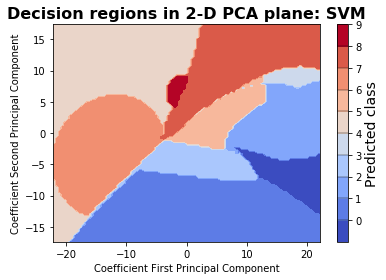

In [37]:
levels = np.arange(-1,10,1)
norm = mc.BoundaryNorm(levels, 256)
ticks = [0,1,2,3,4,5,6,7,8,9]
cf = plt.contourf(coeffs[:,:,0], coeffs[:,:,1], svm_predictions, levels=levels, cmap = "coolwarm", norm=norm)
plt.title("Decision regions in 2-D PCA plane: SVM", weight="bold", fontsize=16)
plt.xlabel("Coefficient First Principal Component")
plt.ylabel("Coefficient Second Principal Component")
cbar = plt.colorbar(ticks=ticks, drawedges=True)
cbar.ax.set_ylabel("Predicted class", fontsize=14)
plt.show()

In [38]:
np.array(np.unique(svm_predictions, return_counts=True)).T

array([[   0,  489],
       [   1, 2323],
       [   2,  954],
       [   3,  541],
       [   4,  145],
       [   5, 2180],
       [   6,  489],
       [   7, 1415],
       [   8, 1404],
       [   9,   60]], dtype=int64)

##### Question 2.5

In [162]:
Xsmall = []
Ysmall = []
for label in range(10):
        samples_of_class = np.array([Xtrn_nm[i,:] for i in range(len(Xtrn_nm)) if Ytrn[i] == label])
        for i in range(1000):
            Xsmall.append(samples_of_class[i])
            Ysmall.append(label)
Xsmall = np.array(Xsmall)
Ysmall = np.array(Ysmall)
c = np.c_[Xsmall, Ysmall]
#np.random.seed(42)
#np.random.shuffle(c)
#np.random.seed()

Xsmall = c[:, :784].reshape(Xsmall.shape)
Ysmall = c[:, 784:].reshape(Ysmall.shape)

In [163]:
from sklearn.model_selection import cross_val_score

C_log_space = [10**i for i in np.arange(-2, 3.0001, 5/9)]
accuracies = [None] * 10

for i in range(10):
    svm = SVC(kernel="rbf", C=C_log_space[i], gamma="auto", random_state=42)
    accuracies[i] = np.mean(cross_val_score(svm, Xsmall, Ysmall, scoring="accuracy", cv=3))

In [164]:
C_log_space

[0.01,
 0.03593813663804628,
 0.1291549665014884,
 0.464158883361278,
 1.6681005372000592,
 5.994842503189409,
 21.544346900318846,
 77.42636826811278,
 278.2559402207126,
 1000.0]

In [165]:
accuracies

[0.6481958005910101,
 0.6910976845108582,
 0.7367022711334088,
 0.783804163444882,
 0.8197017376658096,
 0.8447012881144618,
 0.8565023106939273,
 0.8542039045033057,
 0.8495030959102815,
 0.8406013798229367]

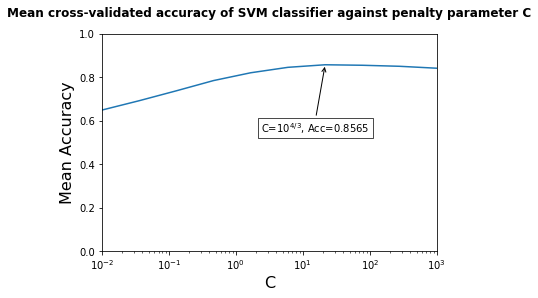

In [169]:
plt.plot(C_log_space, accuracies)
t = plt.title("Mean cross-validated accuracy of SVM classifier against penalty parameter C", 
              weight="bold")
t.set_y(1.05)
plt.xlabel("C", fontsize=16)
plt.ylabel("Mean Accuracy", fontsize=16)
plt.xscale("log", basex=10)
plt.axis([0, 1000, 0, 1])

xmax = C_log_space[np.argmax(accuracies)]
ymax = max(accuracies)
text = "C=$10^{4/3}$, Acc=0.8565"
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.7)
arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=80")
kw = dict(xycoords='data',textcoords="axes fraction",
        arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
plt.gca().annotate(text, xy=(xmax, ymax), xytext=(0.8,0.6), **kw)

plt.show()

##### Question 2.6

In [167]:
svm = SVC(kernel="rbf", C=C_log_space[np.argmax(accuracies)], gamma="auto", random_state=1)
svm.fit(Xtrn_nm, Ytrn)
predictions = svm.predict(Xtst_nm)
accuracy_score(Ytst, predictions)

0.8765

In [168]:
predictions = svm.predict(Xtrn_nm)
accuracy_score(Ytrn, predictions)

0.9084166666666667

## Question 3

In [118]:
Xtrn, Ytrn, Xtst, Ytst = load_CoVoST2("../data")

##### Question 3.1

In [119]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=22, random_state=1)
km.fit(Xtrn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=22, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [120]:
distances = km.transform(Xtrn)
sq_dist_sum = 0.0
for ds in distances:
    d = min(ds)
    sq_dist_sum += d**2
print(sq_dist_sum)

38185.8166201825


In [121]:
for xs in np.array(np.unique(km.labels_, return_counts=True)).T:
    print("Cluster", xs[0], "\tcontains", xs[1], "\tsamples.")

Cluster 0 	contains 1018 	samples.
Cluster 1 	contains 1125 	samples.
Cluster 2 	contains 1191 	samples.
Cluster 3 	contains 890 	samples.
Cluster 4 	contains 1162 	samples.
Cluster 5 	contains 1332 	samples.
Cluster 6 	contains 839 	samples.
Cluster 7 	contains 623 	samples.
Cluster 8 	contains 1400 	samples.
Cluster 9 	contains 838 	samples.
Cluster 10 	contains 659 	samples.
Cluster 11 	contains 1276 	samples.
Cluster 12 	contains 121 	samples.
Cluster 13 	contains 152 	samples.
Cluster 14 	contains 950 	samples.
Cluster 15 	contains 1971 	samples.
Cluster 16 	contains 1251 	samples.
Cluster 17 	contains 845 	samples.
Cluster 18 	contains 896 	samples.
Cluster 19 	contains 930 	samples.
Cluster 20 	contains 1065 	samples.
Cluster 21 	contains 1466 	samples.


##### Question 3.2

In [122]:
elements_per_lang = []
for lang in range(22):
    elements_per_lang.append([Xtrn[i] for i in range(len(Xtrn)) if Ytrn[i] == lang])
    
means = [np.mean(elements_per_lang[i], axis = 0) for i in range(len(elements_per_lang))]

In [123]:
pca = PCA(n_components=2, random_state=1)
pca.fit(means)
two_d_means = pca.transform(means)

In [124]:
centers = km.cluster_centers_
two_d_centers = pca.transform(centers)

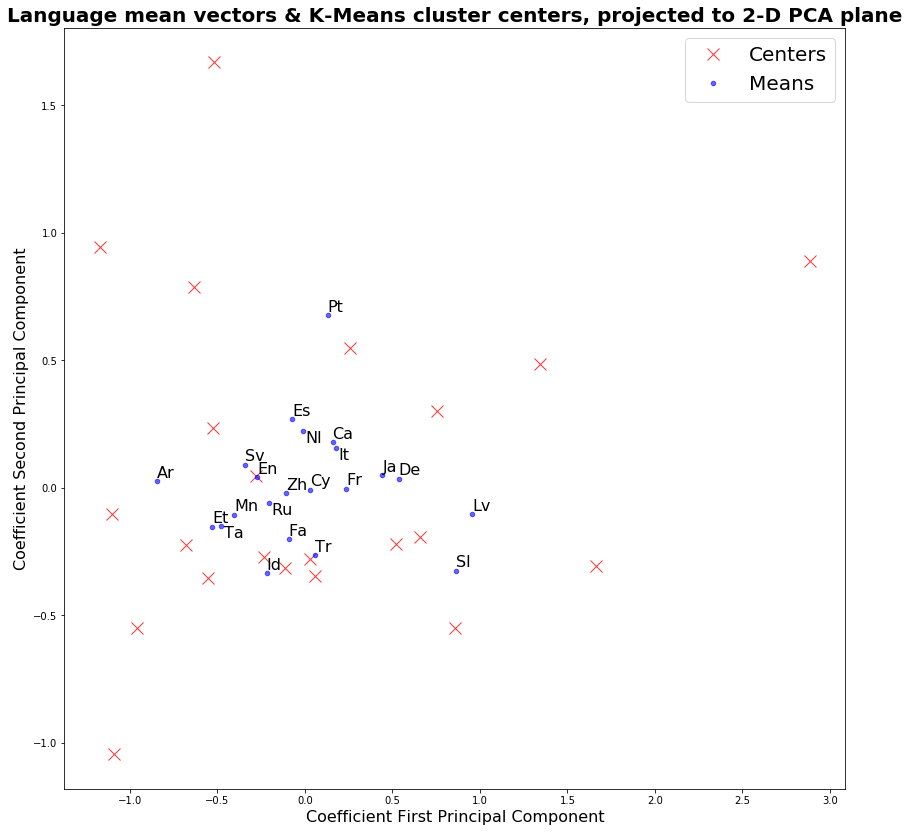

In [125]:
fig, ax = plt.subplots(figsize=(14,14))

centers_pl, = ax.plot(two_d_centers[:, 0], two_d_centers[:, 1], "rx", markersize=12, alpha=0.8)
centers_pl.set_label("Centers")
means_pl, = ax.plot(two_d_means[:, 0], two_d_means[:, 1], "b.", markersize=9, alpha=0.6)
means_pl.set_label("Means")
plt.legend(fontsize=20)

plt.title("Language mean vectors & K-Means cluster centers, projected to 2-D PCA plane", 
          fontsize=20, weight="bold")
plt.xlabel("Coefficient First Principal Component", fontsize=16)
plt.ylabel("Coefficient Second Principal Component", fontsize=16)

languages = ["Arabic", "Catalan", "Welsh", "German", "English", "Spanish", "Estonian", "Persian",
            "French", "Indonesian", "Italian", "Japanese", "Latvian", "Mongolian", "Dutch", "Russian",
            "Slovenian", "Swedish", "Portuguese", "Tamil","Turkish", "Chinese"]
abbrevs = ["Ar", "Ca", "Cy", "De", "En", "Es", "Et", "Fa", "Fr", "Id", "It", "Ja", "Lv",
          "Mn", "Nl", "Ru", "Sl", "Sv", "Pt", "Ta", "Tr", "Zh"]
for i in range(22):    
    if (abbrevs[i] in ["It", "Ta", "Ru", "Nl"]):
        #ax.annotate(str(i), (two_d_means[i][0]+0.015, two_d_means[i][1]-0.035), fontsize=16) # Numbers
        ax.annotate(abbrevs[i], (two_d_means[i][0]+0.015, two_d_means[i][1]-0.045), fontsize=16) # Abbreviations
    else:
        #ax.annotate(str(i), (two_d_means[i][0], two_d_means[i][1]+0.015), fontsize=16) # Numbers
        ax.annotate(abbrevs[i], (two_d_means[i][0], two_d_means[i][1]+0.015), fontsize=16) # Abbreviations

plt.show()

##### Question 3.3

In [126]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram

In [127]:
means = np.array(means)
mean_dists = pdist(means)
mean_dists.shape # Upper triangular 22x22, flattened, 21*22/2

(231,)

In [128]:
hc_linkage_mat = hierarchy.ward(mean_dists)
hc_linkage_mat.shape

(21, 4)

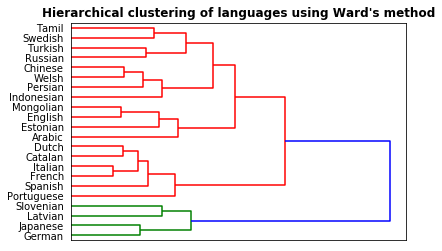

In [129]:
dendrogram(hc_linkage_mat, orientation="right", labels=languages)
plt.tick_params("both", which="both", bottom=False, top=False, labelbottom=False)
plt.title("Hierarchical clustering of languages using Ward's method", weight="bold")
plt.show()

##### Question 3.4

In [130]:
extended_languages = []
extended_means = []
for i in range(22):
    km = KMeans(n_clusters=3, random_state=1)
    km.fit(elements_per_lang[i])
    for j in range(3):
        cc = km.cluster_centers_[j]
        extended_means.append(cc)
        extended_languages.append(languages[i] + "_" + str(j+1))

In [131]:
extended_means = np.array(extended_means)
extended_mean_dists = pdist(extended_means)
extended_mean_dists.shape # Upper triangular 66x66, flattened, 65*66/2

(2145,)

In [132]:
hc_linkage_mat = hierarchy.ward(extended_mean_dists)
hc_linkage_mat.shape

(65, 4)

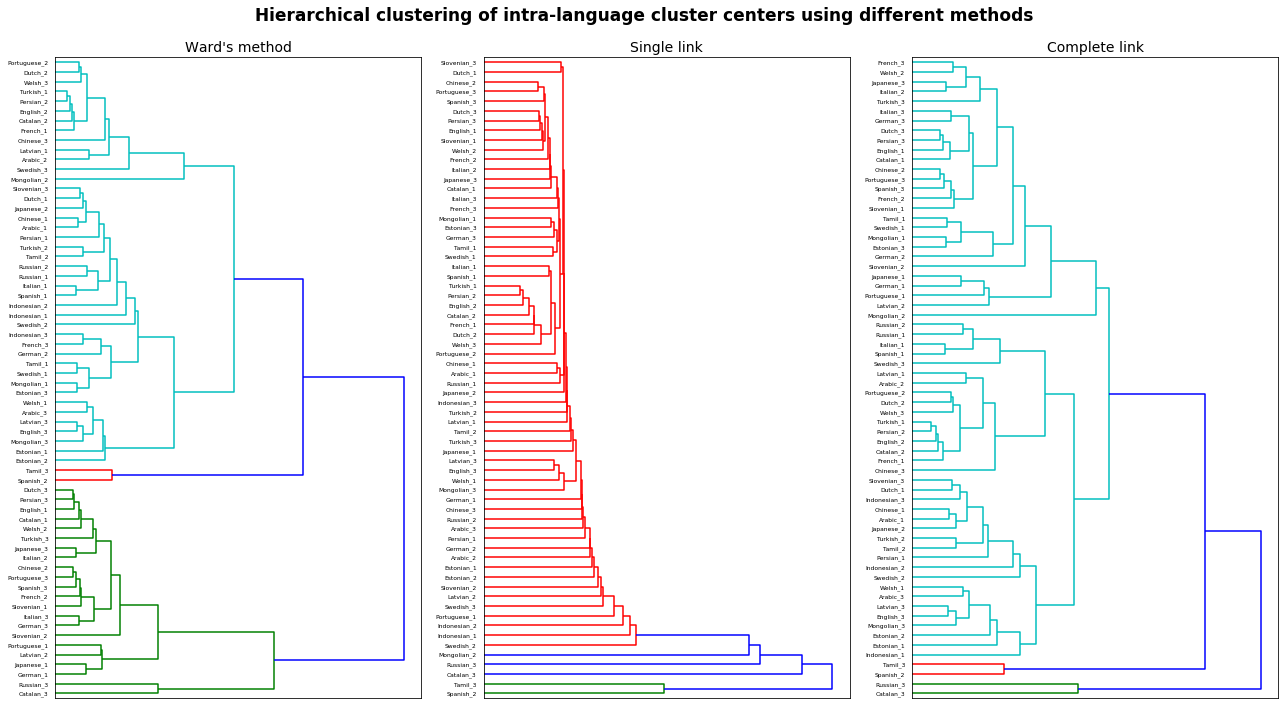

In [133]:
fig, axes = plt.subplots(1, 3, figsize=(18,10))
fig.suptitle("Hierarchical clustering of intra-language cluster centers using different methods", weight="bold",
            fontsize=17)

hc_linkage_mat = hierarchy.ward(extended_mean_dists)
dendrogram(hc_linkage_mat, orientation="right", labels=extended_languages, ax=axes[0])
axes[0].tick_params("both", which="both", bottom=False, top=False, labelbottom=False)
axes[0].set_title("Ward's method", fontsize=14)

hc_linkage_mat = hierarchy.single(extended_mean_dists)
dendrogram(hc_linkage_mat, orientation="right", labels=extended_languages, ax=axes[1])
axes[1].tick_params("both", which="both", bottom=False, top=False, labelbottom=False)
axes[1].set_title("Single link", fontsize=14)

hc_linkage_mat = hierarchy.complete(extended_mean_dists)                                                                                   
dendrogram(hc_linkage_mat, orientation="right", labels=extended_languages, ax=axes[2])
axes[2].tick_params("both", which="both", bottom=False, top=False, labelbottom=False)
axes[2].set_title("Complete link", fontsize=14)

fig.tight_layout()
fig.subplots_adjust(top=0.91)

plt.show()

##### Question 3.5

In [134]:
from sklearn.mixture import GaussianMixture

arab_train = [Xtrn[i] for i in range(len(Xtrn)) if Ytrn[i] == 0]
arab_test = [Xtst[i] for i in range(len(Xtst)) if Ytst[i] == 0]
covs = ["diag", "full"]
Ks = [1, 3, 5, 10, 15]
lls = np.zeros((5, 2, 2))
for i in range(5):
    for j in range(2):
        gmm = GaussianMixture(n_components=Ks[i], covariance_type=covs[j], random_state=1)
        gmm.fit(arab_train)
        lls[i,j,0] = gmm.score(arab_train, y="y not?")
        lls[i,j,1] = gmm.score(arab_test)

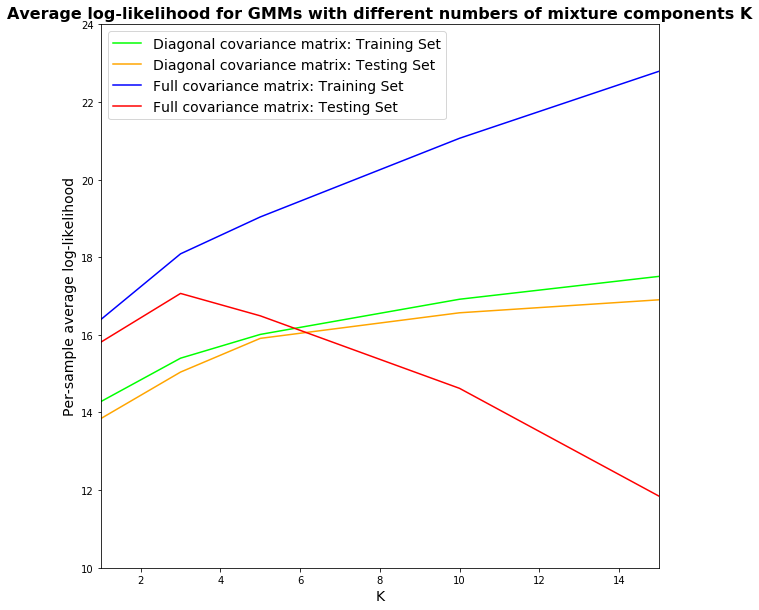

In [135]:
fig, ax = plt.subplots(figsize=(10,10))

diag_train, = plt.plot(Ks, lls[:, 0, 0], "lime")
diag_train.set_label("Diagonal covariance matrix: Training Set")
diag_test, = plt.plot(Ks, lls[:, 0, 1], "orange")
diag_test.set_label("Diagonal covariance matrix: Testing Set")
full_train, = plt.plot(Ks, lls[:, 1, 0], "blue")
full_train.set_label("Full covariance matrix: Training Set")
full_test, = plt.plot(Ks, lls[:, 1, 1], "red")
full_test.set_label("Full covariance matrix: Testing Set")
plt.legend(fontsize=14)

plt.axis([1,15,10,24])
plt.title("Average log-likelihood for GMMs with different numbers of mixture components K", fontsize=16, weight="bold")
plt.ylabel("Per-sample average log-likelihood", fontsize=14)
plt.xlabel("K", fontsize=14)

plt.show()

In [136]:
lls

array([[[14.28041612, 13.84292393],
        [16.39360044, 15.81051154]],

       [[15.39842975, 15.04074827],
        [18.08600494, 17.06607626]],

       [[16.01038877, 15.90854612],
        [19.03572395, 16.48942646]],

       [[16.91650477, 16.56756523],
        [21.06202034, 14.62176324]],

       [[17.50462689, 16.90167948],
        [22.786023  , 11.84797629]]])